# Rice Diseases are classified using CNN with Tensorflow

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# import train.csv file
data = pd.read_csv("./rice_leaf_diseases_dataset/train.csv")
data.head()

,image_id,label,variety,age_in_days
0,bacterial_leaf_blight/DSC_0406.JPG,bacterial_leaf_blight,IR20,37
1,bacterial_leaf_blight/DSC_0397.JPG,bacterial_leaf_blight,Onthanel,87
2,bacterial_leaf_blight/DSC_0703.JPG,bacterial_leaf_blight,IR20,94
3,bacterial_leaf_blight/DSC_0386.JPG,bacterial_leaf_blight,IR20,47
4,bacterial_leaf_blight/DSC_0385.jpg,bacterial_leaf_blight,ADT45,36


In [3]:
# check the shape of data
data.shape

(120, 4)

In [4]:
data['label'].unique().tolist()

['bacterial_leaf_blight', 'brown_spot', 'leaf_smut']

In [5]:
data['variety'].unique().tolist()

['IR20', 'Onthanel', 'ADT45']

In [6]:
data['age_in_days'].describe()

count    120.000000
mean      72.241667
std       26.703475
min       30.000000
25%       47.000000
50%       73.500000
75%       95.250000
max      118.000000
Name: age_in_days, dtype: float64

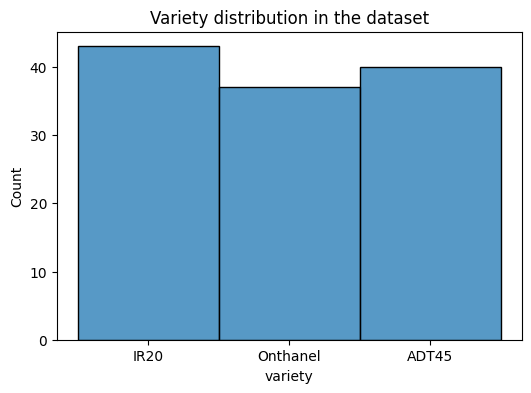

In [7]:
# plot the data count based on variety name
fig,axes = plt.subplots(1,1,figsize=(6,4))
sns.histplot(data,x='variety',ax=axes)
plt.title('Variety distribution in the dataset')
plt.show()

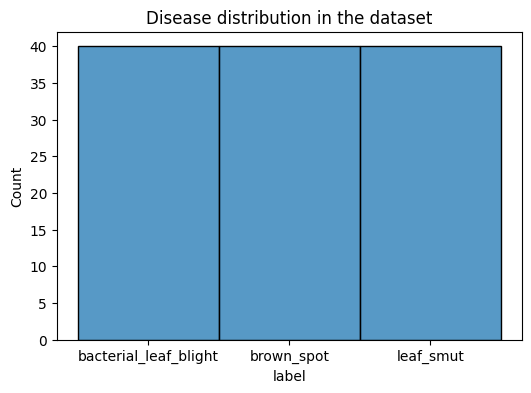

In [8]:
# plot the data count based on disease name
fig,axes = plt.subplots(1,1,figsize=(6,4))
sns.histplot(data,x='label',ax=axes)
plt.title('Disease distribution in the dataset')
plt.show()

In [17]:
bacterial_leaf_blight = data[data['label'] =='bacterial_leaf_blight']
bacterial_leaf_blight_N_IR20 = bacterial_leaf_blight[bacterial_leaf_blight['variety'] =='IR20']
five_blight = bacterial_leaf_blight_N_IR20.image_id[:5]
print(five_blight)

0    bacterial_leaf_blight/DSC_0406.JPG
2    bacterial_leaf_blight/DSC_0703.JPG
3    bacterial_leaf_blight/DSC_0386.JPG
5    bacterial_leaf_blight/DSC_0388.JPG
8    bacterial_leaf_blight/DSC_0366.jpg
Name: image_id, dtype: object


In [18]:
brown_spot = data[data['label'] =='brown_spot']
brown_spot_N_IR20 = brown_spot[brown_spot['variety'] =='IR20']
five_brown_spot= brown_spot_N_IR20.image_id[:5].values
five_brown_spot.tolist()

['brown_spot/DSC_0115.jpg',
 'brown_spot/DSC_0325.JPG',
 'brown_spot/DSC_0329.jpg',
 'brown_spot/DSC_0296.jpg',
 'brown_spot/DSC_0108.jpg']

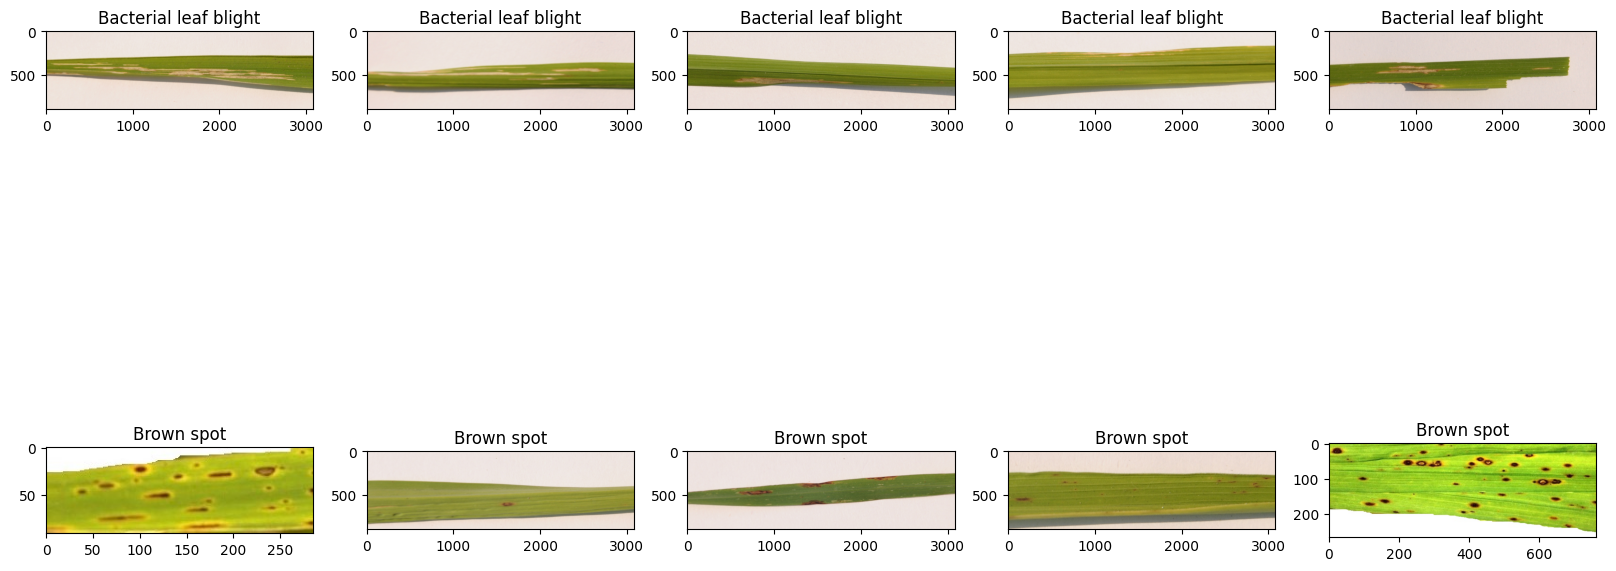

In [27]:
# make plot of images just to have an idea
plt.figure(figsize=(20,10))
columns = 5
path = './rice_leaf_diseases_dataset/train/'
for i, image_loc in enumerate(np.concatenate((five_blight, five_brown_spot))):
    plt.subplot(10//columns, columns, i + 1)
    
    if i < 5:
        plt.title("Bacterial leaf blight")
    else:
        plt.title("Brown spot")
        
    image=plt.imread(path + image_loc)
    plt.imshow(image)

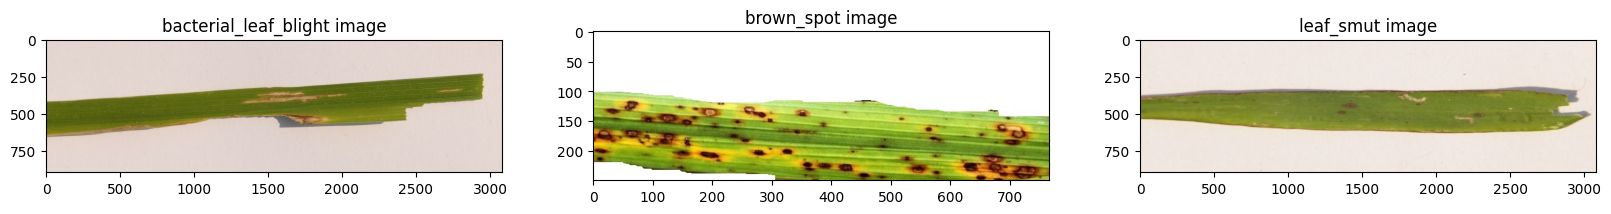

In [26]:
images = ['./rice_leaf_diseases_dataset/train/bacterial_leaf_blight/DSC_0365.JPG',\
          './rice_leaf_diseases_dataset/train/brown_spot/DSC_0100.jpg',\
          './rice_leaf_diseases_dataset/train/leaf_smut/DSC_0293.JPG',
         ] # picked any 3 images
diseases = ['bacterial_leaf_blight','brown_spot','leaf_smut']
diseases = [disease + ' image' for disease in diseases]
plt.figure(figsize=(20,10))
columns = 3
for i, image_loc in enumerate(images):
    plt.subplot(len(images)//columns, columns, i + 1)
    image=plt.imread(image_loc)
    plt.title(diseases[i])
    plt.imshow(image)

In [28]:
data.head()

,image_id,label,variety,age_in_days
0,bacterial_leaf_blight/DSC_0406.JPG,bacterial_leaf_blight,IR20,37
1,bacterial_leaf_blight/DSC_0397.JPG,bacterial_leaf_blight,Onthanel,87
2,bacterial_leaf_blight/DSC_0703.JPG,bacterial_leaf_blight,IR20,94
3,bacterial_leaf_blight/DSC_0386.JPG,bacterial_leaf_blight,IR20,47
4,bacterial_leaf_blight/DSC_0385.jpg,bacterial_leaf_blight,ADT45,36


In [34]:
# encode both columns label and variety
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
data['variety'] = label_encoder.fit_transform(data['variety'])

data.sample(n=5, random_state=123)

,image_id,label,variety,age_in_days
4,bacterial_leaf_blight/DSC_0385.jpg,0,0,36
117,leaf_smut/DSC_0504.jpg,2,1,117
112,leaf_smut/DSC_0313.JPG,2,1,111
104,leaf_smut/DSC_0503.jpg,2,1,70
31,bacterial_leaf_blight/DSC_0395.JPG,0,2,99


In [ ]:
# define parameter
batch_size = 32
img_height = 64
img_width = 64

In [36]:
# define path to the images

# create training dataset from directory
train_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 120 files belonging to 3 classes.


Using 96 files for training.


2025-09-23 13:32:59.362088: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [37]:
# create validation dataset from directory
val_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 120 files belonging to 3 classes.
Using 24 files for validation.


In [38]:
class_names = train_ds.class_names # print all directory names from 'train' directory
print(class_names)

['bacterial_leaf_blight', 'brown_spot', 'leaf_smut']


In [39]:
# printing only first batch
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 64, 64, 3)
(32,)


In [40]:
normalization_layer = tf.keras.layers.Rescaling(1./255) # normalize the data

In [41]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) # normalizing the dataset
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# Print min and max pixel value for first image.
print(np.min(first_image), np.max(first_image))

0.057667933 0.969516


In [42]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [43]:
num_classes = len(class_names)
num_classes

3

In [44]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255), # normalization layer
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [45]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step - accuracy: 0.4049 - loss: 1.0939 - val_accuracy: 0.1667 - val_loss: 1.1699
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.4388 - loss: 1.0642 - val_accuracy: 0.2500 - val_loss: 1.1305
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - accuracy: 0.4115 - loss: 1.0726 - val_accuracy: 0.2500 - val_loss: 1.1295
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - accuracy: 0.4362 - loss: 1.0548 - val_accuracy: 0.2500 - val_loss: 1.1529
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.4753 - loss: 1.0247 - val_accuracy: 0.2917 - val_loss: 1.1355
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - accuracy: 0.5560 - loss: 0.9838 - val_accuracy: 0.3750 - val_loss: 1.0852
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.5482 - loss: 0.9785 - val_accuracy: 0.4583 - val_loss: 1.0372
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.5612 - loss: 0.9504 - val_accuracy: 0.4167 - val_loss:

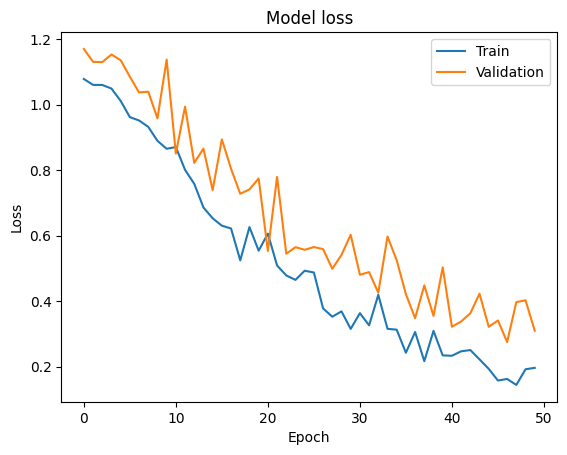

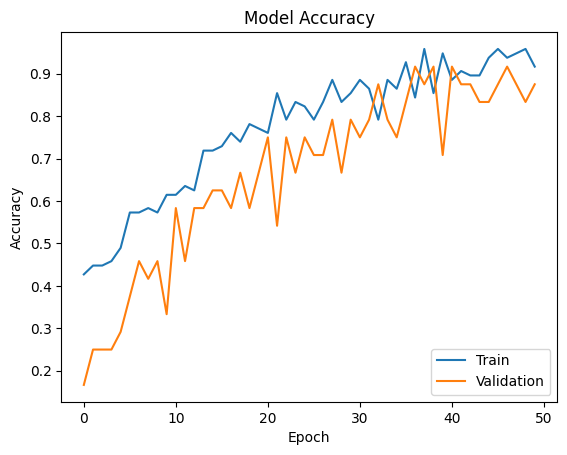

CPU times: user 4min, sys: 2.47 s, total: 4min 2s
Wall time: 33.5 s


In [47]:
%%time
#remove warnings
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.callbacks import EarlyStopping
# Define the callback function
early_stopping = EarlyStopping(patience=5)

history= model.fit(train_ds,
          validation_data=val_ds,
          epochs=50,
          callbacks=[early_stopping])

# evaluat the model
loss = model.evaluate(val_ds)

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

## Observations:
1. We have 120, images in train data.
2. We have 3 unique disease classes.
3. We also have 3 varietes of RICE in this data.
4. We have rice plant age ranging from 30 - 118 days.
5. IR20 is the most common variety inside the training data.